<a href="https://colab.research.google.com/github/sephinreji/Whatsapp-Analyzer/blob/main/Whatsapp_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Whatsapp Analyzer

# New section

In [22]:
import re
from collections import Counter
from tokenize import String
from matplotlib import pyplot as plt
from django.shortcuts import render
import pandas as pd
# Create your views here.
from django.views import View

In [2]:
def start_date_time(line):
    d_pattern = '^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9]|[0-9][0-9]):([0-9][0-9]) (pm|am) -'
    result=re.match(d_pattern,line)
    if result:
        return True
    return False

In [3]:
def get_data(line):
    new=line.split(' - ')
    datetime=new[0]
    date,time=datetime.split(', ')
    author_msg=new[1].split(': ')
    author=author_msg[0]
    msg=author_msg[1]
    return date,time,author,msg

In [5]:
def text_normalization(text):
    text = str(text).lower()
    return text

In [10]:
def get_dataframe():
    data=[]
    date, time, author, msg=None,None,None,None
    from google.colab import files
    import io
    uploaded = files.upload()
    with open('whatsapp_chat.txt',encoding="utf-8") as fp:
        while True:
            line=fp.readline()
            if not line:
                break
            line=line.strip()

            if start_date_time(line):
                date,time,author,msg=get_data(line)

            else:
                sub_msg=' '+line
                msg=msg+sub_msg
            data.append([date,time,author,msg])
    dframe=pd.DataFrame(data,columns=['date','time','author','message'])
    dframe['message1']=dframe['message'].apply(lambda x: text_normalization(x))
    return dframe

In [18]:
df = get_dataframe()
count=df.describe()['date']['count']
ath=df['author'].value_counts()#count of messages of both users
print(ath)
    

Saving whatsapp_chat.txt to whatsapp_chat (3).txt
Sephin       259
Supradeep    225
Name: author, dtype: int64


259


<BarContainer object of 2 artists>

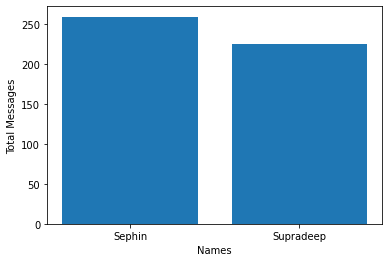

In [41]:
print(ath['Sephin'])
x=['Sephin','Supradeep']
y=[ath['Sephin'],ath['Supradeep']]
plt.xlabel('Names')
plt.ylabel('Total Messages')
plt.bar(x,y)

In [56]:
#Word Count
a=df['message1'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
a.head(10)

ithi       1.0
unit       9.0
ano        3.0
1st        7.0
yaaa       9.0
ok        45.0
ayachu     1.0
da        25.0
para       2.0
<media    96.0
dtype: float64

In [40]:
df['message'].value_counts()


<Media omitted>                                                 92
Ok ok                                                           14
Yaaa                                                             6
Yaa                                                              5
Da                                                               4
                                                                ..
Yaa anu                                                          1
Baaaki last il yoga nu oru topic koodi ond                       1
🤗 Supradeep  has sent your *Final Friendship Dare of 2020* 🤗     1
Ills                                                             1
Matta bootstrap files ellam ond athil                            1
Name: message, Length: 351, dtype: int64

In [106]:
length=df['message1'].str.len()
length.nlargest(5)


79     172
78     144
403    143
110    141
408    140
Name: message1, dtype: int64

In [107]:
df['length']=df['message1'].str.len()
df.head()

,date,time,author,message,message1,length
0,18/09/2020,10:36 am,Sephin,Ithi 1st unit ano,ithi 1st unit ano,17
1,18/09/2020,10:37 am,Supradeep,Yaaa,yaaa,4
2,18/09/2020,10:37 am,Sephin,Ok ok,ok ok,5
3,18/09/2020,11:06 am,Supradeep,Ayachu,ayachu,6
4,18/09/2020,11:16 am,Sephin,Da,da,2


In [109]:
df.groupby(['author']).mean()#Average message length of each user

,length
author,
Sephin,23.111969
Supradeep,19.075556


In [58]:
pip install emoji

     |████████████████████████████████| 51kB 1.9MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=94b2a589969352c81c16be4112d6eff019c5e2e1faca8092d11842b470fbde94
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji
